## Import Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

**Date**: Date that the order occured.\
**Hour**: Hour that the order occured.\
**Name**: Name of the product ordered.\
**Requested_Orders**: How many orders had that product in that date and hour.\
**Accepted_Orders**: How many orders that were accepted had that item.\
**Completed_Orders_Ofo_State**: How many orders with that item were completed.\
**First_Time_Orders**: How many of these items were the first order of the buyer.\
**First_Time_Orders_Promo**: Same as above, but count if it has a promo in the order. Note that the number in the previous column contemplates orders with **or** without promo.\
**Returning_Orders**: Orders returned.\
**Returning_Orders_Promo**: Orders returned which had a promo.\
**Order_Issues**: Orders that had an issue.\
**Avg_Prep_Time**: Average prep time in seconds.\
**Avg_Rating**: Avg rating given in the order.\
**Total_Eater_Spend**: Total time buyer spent eating.\
**Total_Eater_Spend_1**: ???

In [2]:
df = pd.read_csv("data/raw_data.csv")
df.head()

,date,hour,name,requested_orders,accepted_orders,completed_orders_ofo_state,first_time_orders,first_time_orders_promo,returning_orders,returning_orders_promo,order_issues,avg_prep_time,avg_rating,total_eater_spend,total_eater_spend__1
0,2022-02-17,15,Tater Tots,1,1,1,0,0,1,0,NaN,NaN,NaN,23.25,0.00
1,2022-02-21,19,2 Protein Poke Bowl,3,3,3,2,2,1,0,NaN,NaN,NaN,130.00,-43.50
2,2022-02-24,11,Bacon Breakfast Burrito,12,12,12,7,2,5,4,NaN,4585.833333,4.0,1496.60,-111.00
3,2022-02-16,9,Bagel with Lox,7,7,7,6,5,1,1,1.0,51.000000,NaN,219.50,-47.22
4,2022-02-18,19,Spicy Fried Rice,1,1,1,1,1,0,0,NaN,667.000000,NaN,23.99,-5.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   date                        100000 non-null  object 
 1   hour                        100000 non-null  int64  
 2   name                        100000 non-null  object 
 3   requested_orders            100000 non-null  int64  
 4   accepted_orders             100000 non-null  int64  
 5   completed_orders_ofo_state  100000 non-null  int64  
 6   first_time_orders           100000 non-null  int64  
 7   first_time_orders_promo     100000 non-null  int64  
 8   returning_orders            100000 non-null  int64  
 9   returning_orders_promo      100000 non-null  int64  
 10  order_issues                7503 non-null    float64
 11  avg_prep_time               32443 non-null   float64
 12  avg_rating                  14779 non-null   float64
 13  total_eater_spe

In [4]:
df.describe(percentiles=[])

,hour,requested_orders,accepted_orders,completed_orders_ofo_state,first_time_orders,first_time_orders_promo,returning_orders,returning_orders_promo,order_issues,avg_prep_time,avg_rating,total_eater_spend,total_eater_spend__1
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,7503.000000,32443.000000,14779.000000,84190.000000,84190.000000
mean,14.331280,2.07785,2.057410,1.903980,1.220090,0.675030,0.474380,0.280450,1.195522,1886.162614,4.064915,136.727116,-22.466638
std,5.851801,3.31480,3.294022,3.149393,2.125567,1.336825,1.084544,0.704729,0.570324,5038.696393,1.401857,2197.552823,1005.546949
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,-112150.000000
50%,15.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,970.000000,5.000000,49.450000,-3.990000
max,23.000000,84.00000,84.000000,77.000000,56.000000,35.000000,27.000000,17.000000,11.000000,241259.000000,5.000000,249500.000000,0.000000


## Remove outliers

In [195]:
df.columns

Index(['date', 'hour', 'name', 'requested_orders', 'accepted_orders',
       'completed_orders_ofo_state', 'first_time_orders',
       'first_time_orders_promo', 'returning_orders', 'returning_orders_promo',
       'order_issues', 'avg_prep_time', 'avg_rating', 'total_eater_spend',
       'total_eater_spend__1'],
      dtype='object')

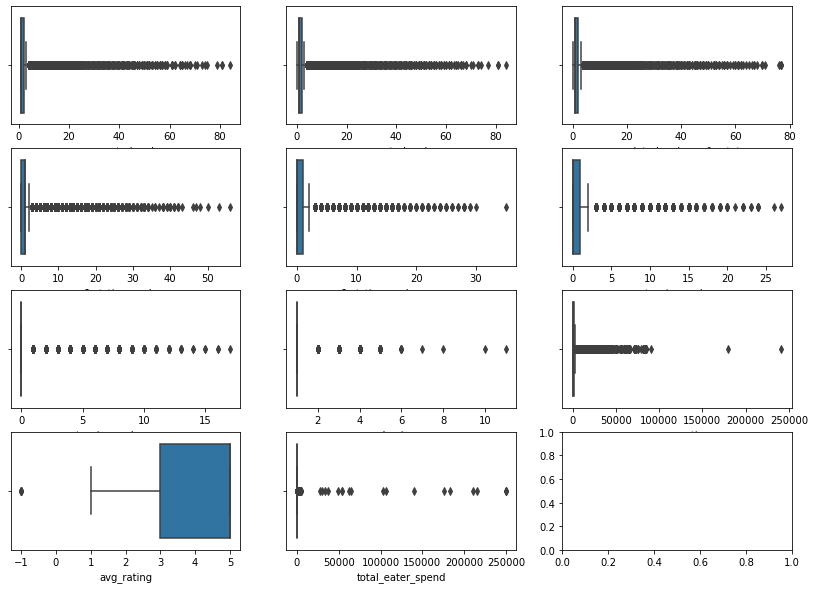

In [199]:
cols = ['requested_orders', 'accepted_orders', 'completed_orders_ofo_state', 'first_time_orders',
       'first_time_orders_promo', 'returning_orders', 'returning_orders_promo',
       'order_issues', 'avg_prep_time', 'avg_rating', 'total_eater_spend']
axises = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2)]

fig, axs = plt.subplots(4, 3, figsize=(14,10))


for col, ax in zip(cols, axises):
    sns.boxplot(x=df[col], ax=axs[ax])

In [200]:
for col in cols:
    print(col, "Highest allowed",int(df[col].mean() + 3*df[col].std())+1)

requested_orders Highest allowed 13
accepted_orders Highest allowed 12
completed_orders_ofo_state Highest allowed 12
first_time_orders Highest allowed 8
first_time_orders_promo Highest allowed 5
returning_orders Highest allowed 4
returning_orders_promo Highest allowed 3
order_issues Highest allowed 3
avg_prep_time Highest allowed 17003
avg_rating Highest allowed 9
total_eater_spend Highest allowed 6730


In [212]:
filtered_df = df[ ((df["requested_orders"]<=13) | (df["requested_orders"].isnull())) & 
   ((df["accepted_orders"]<=12)  | (df["accepted_orders"].isnull())) &
    ((df["completed_orders_ofo_state"]<=12)  | (df["completed_orders_ofo_state"].isnull())) &
   ((df["first_time_orders"]<=8) | (df["first_time_orders"].isnull())) &
   ((df["first_time_orders_promo"]<=5)  | (df["first_time_orders_promo"].isnull())) &
    ((df["returning_orders"]<=4)  | (df["returning_orders"].isnull())) &
    ((df["returning_orders_promo"]<=4)  | (df["returning_orders_promo"].isnull())) &
   ((df["order_issues"]<=3) | (df["order_issues"].isnull())) &
   ((df["avg_prep_time"]<=17000) | (df["avg_prep_time"].isnull())) &
   ((df["avg_rating"]>0) | df["avg_rating"].isnull()) &
    ((df["total_eater_spend"]<=6730) | df["total_eater_spend"].isnull()) 
  ].reset_index()

In [209]:
(len(df)-len(filtered_df))/len(df)

0.02601

2.6% of data were removed due to outliers.

## Explore products

Goal: **To do some sort of data cleaning in the items strings to know which items are trending.**

How many unique items?

In [232]:
len(filtered_df["name"].unique())

5196

### Check if there's misspelled data

Check some names

In [253]:
df["name"].sample(5)

12709                  Garlic Naan
85813                  Greek Salad
88407    Awesome Almond Power Bowl
21493    Carne Asada Wham! Burrito
23398            Grilled Lamb Pita
Name: name, dtype: object

In [269]:
# Create sample of some names
name_sample = list(filtered_df.sample(1000)["name"])

In [270]:
# Define a function that checks if two strings are similar
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [272]:
similar("Pizza", "Many Pizzas")

0.625

In [271]:
# Check if the sample have strings with similar names. 
# The final value is the average of the score defined by the function above.
# If the score > 0.5, it means many strings have similar names.
t = 0
c = 0
for name in name_sample:
    for other_name in name_sample:
        t+=similar(name, other_name)
        c+=1
print(t/c)

0.23389431224979956


It appears no data cleaning needs to be done concearning the string itselves.

In [303]:
names_sum = filtered_df.groupby(by="name").sum().drop("hour", axis=1).drop("index", axis=1)
names_mean = filtered_df.groupby(by="name").mean().drop("hour", axis=1).drop("index", axis=1)

**Which are the top 10 most ordered meals?**

In [328]:
names_sum.sort_values("requested_orders", ascending=False).head(20)["requested_orders"]

name
Coke (can)                   933
Lemonade                     898
Fries                        892
Sprite                       891
Tater Tots                   873
Coke (bottle)                852
Iced Tea                     850
Fresh Cut Fries              815
Mozzarella Sticks            807
Bacon Cheese Fries           796
Coke                         796
Philadelphia Cheesesteak     781
Build Your Own Acai Bowl     773
Philly Cheesesteak           766
Chips and Salsa              746
Carne Asada Wham! Burrito    728
Caesar Salad                 724
Classic Cheesesteak          694
Fettucine Alfredo            679
Hash Browns                  671
Name: requested_orders, dtype: int64

**Which items are trending in the last week?**

In [347]:
from datetime import timedelta
last_week = filtered_df["date"].max()-timedelta(days=7)
filtered_df[filtered_df["date"]>=last_week].sort_values(
    "requested_orders", ascending=False
    ).head(10)[["name", "requested_orders"]].set_index("name")

,requested_orders
name,
Home Fries,13
"Sausage, Egg and Cheese Sandwich",13
Fries,12
Chicken Tikka Masala,12
Build Your Own Burrito,12
Side of Fruit,12
Garlic Naan,12
Lemonade,12
Coney Island Calzone,12


## Check similar items

Let's look at the table above. For some reason lemonade appears twice, and fries appears in two different strings. We should be able to join that data.

In [357]:
import keyword

In [360]:
from difflib import get_close_matches
get_close_matches("sandwich", keyword.kwlist)

[]